#### 과제1 : 메인화면 페이지 화면캡쳐 및 저장

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [2]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [3]:
url_page = 'https://www.istarbucks.co.kr/index.do'
driver.get(url_page)

In [4]:
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()

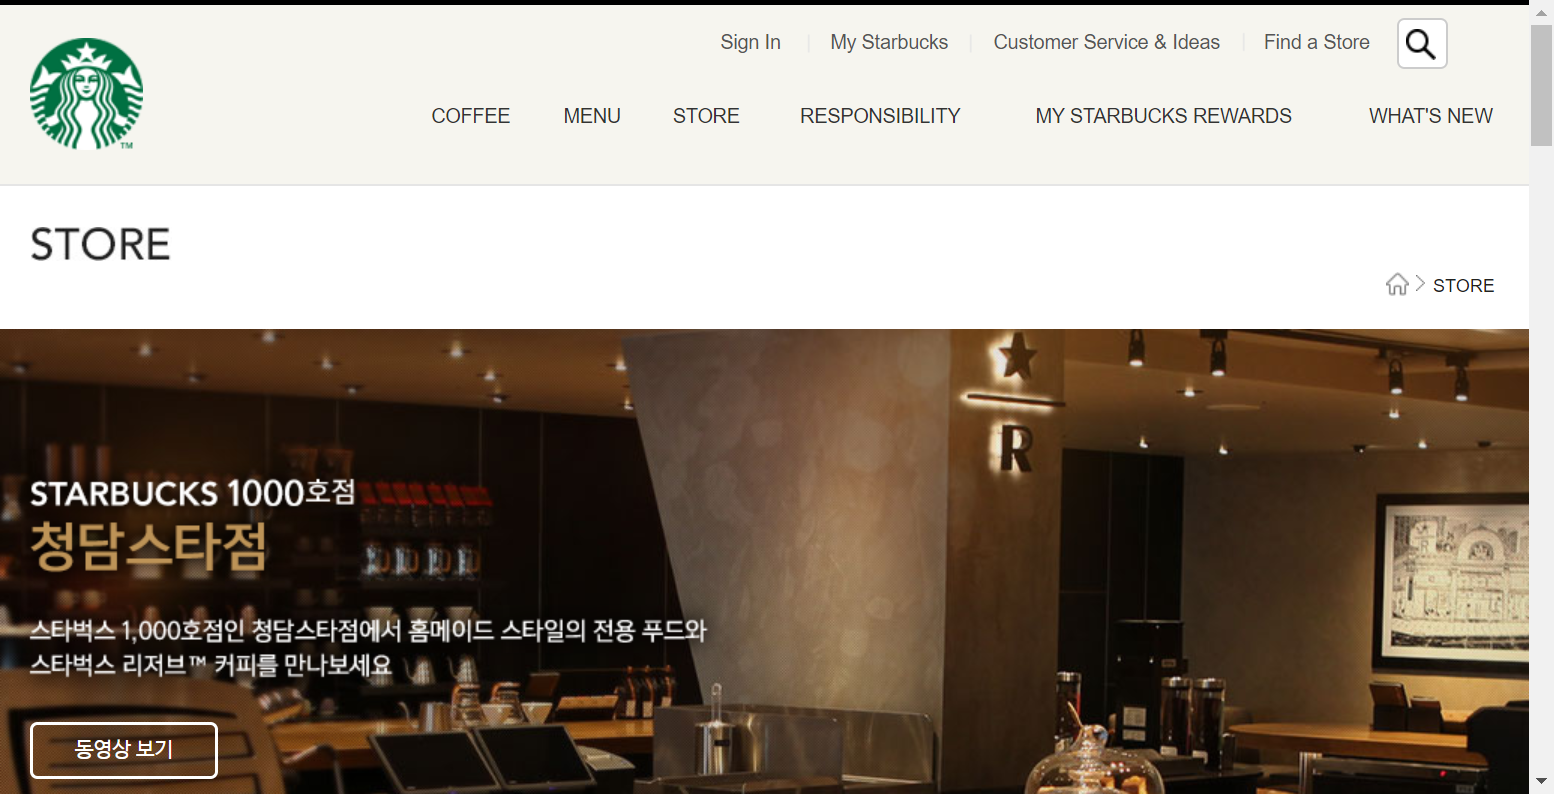

In [5]:
capture_img = './images/starbucks_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

#### 과제2 : 서울지역 스타벅스 매장정보 크롤링

In [6]:
#매장정보 탭 클릭
driver.find_element_by_css_selector('#container > section.store_bn1_section > article > div.store_bn1_btn > a').click()

In [7]:
# 지역검색클릭 
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [8]:
# 지역검색에서 서울 클릭하기
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [9]:
# 서울 중에서도 전체 클릭하기
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [10]:
# 리스트 특징 파악하기

#mCSB_3_container > ul > li:nth-child(1)
#mCSB_3_container > ul > li:nth-child(5)
#mCSB_3_container > ul > li:nth-child(499)

#
#mCSB_3_container > ul > li:nth-child(idx)로 표현할 수 있을 것 같고 생각했지만 능력의 한계이다...

In [11]:
current_url = driver.current_url
current_url

'https://www.istarbucks.co.kr/store/store_map.do'

In [12]:
driver.find_element_by_css_selector('#mCSB_3_container > ul > li:nth-child(1)').click()

In [13]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
tmp = soup.find_all("li", "quickResultLstCon" )

In [14]:
len(tmp) 

509

In [15]:
tmp 

[<li class="quickResultLstCon" data-code="3046" data-hlytag="null" data-index="0" data-lat="37.5570379" data-long="127.04002" data-name="엔터식스한양대" data-storecd="867" style="background:#fff"> <strong>엔터식스한양대  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="엔터식스한양대" data-store="867" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 성동구 행당동 왕십리로 241 B1층<br/>02-758-8846</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="9215" data-hlytag="null" data-index="1" data-lat="37.55726984" data-long="127.0421649" data-name="한양대" data-storecd="160" style="background:#fff"> <strong>한양대  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="한양대" data-store="160" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 성동구 왕십리로 225 (행당동)<br/>02-758-8

In [16]:
tmp[508] #리스트 중 마지막 스벅 점 

<li class="quickResultLstCon" data-code="9570" data-hlytag="null" data-index="498" data-lat="37.613433" data-long="127.077484" data-name="묵동이마트" data-storecd="363" style="background:#fff"> <strong>묵동이마트  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="묵동이마트" data-store="363" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 중랑구 동일로 932, 묵동이마트 B1층 (묵동)<br/>02-758-8370</p> <i class="pin_general">리저브 매장 2번</i></li>

In [17]:
tmp[10] #리스트 중 첫번째 스벅 점

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>02-568-3762</p> <i class="pin_general">리저브 매장 2번</i></li>

In [18]:
#가설 
#위치 쿠키 동의해서 집에서 가까운 스타벅스 10개점 상위로 노출되고, 아래도 다시 있는 것 같음...ㅠ 
#10번째부터 끝까지 써야지 base raw data로 쓸 수 있을 듯! idx 10 - 508까지만 필요! =>chd 499개 
#index 0 -498로 구분되어 있음
#<ul class="quickSearchResultBoxSidoGugun"><li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>02-568-3762</p> <i class="pin_general">리저브 매장 2번</i>

In [19]:
#가설 확인 
tmp_1 = tmp[10:]

In [20]:
tmp_1 #이게 정확한 리스트 같음!

[<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>02-568-3762</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong>논현역사거리  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>0

In [21]:
len(tmp_1) #지점 갯수도 일치 

499

In [22]:
tmp_1[0] #우선 아무거나 찍어서 가져옴 

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong>역삼아레나빌딩  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>02-568-3762</p> <i class="pin_general">리저브 매장 2번</i></li>

In [24]:
#이것도 리스트 중 아무거나-
taginfo = tmp_1[17].get_text()
taginfo

' 압구정   서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306 리저브 매장 2번'

In [25]:
## 리스트 정리해보기
import pandas as pd
import time
import re

from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [26]:
#전화번호 뽑고, 지점명 뽑고, 그 후에 주소 뽑아야 겠다......

#스벅 전화번호
sbucksTel = re.search('\d{2}[-]\d{3,4}[-]\d{4}', taginfo)
 
sbucksTel

#### 왜 이렇게 나오지..................!!!!!!!!?????

<re.Match object; span=(33, 44), match='02-541-3306'>

In [27]:
#스벅 전화번호 RE
sbucksTel = re.search('\d{2}[-]\d{3,4}[-]\d{4}', taginfo)
                        
if sbucksTel is not None:
    sbucksTel = sbucksTel.group()
else:
    sbucksTel = 'No Contact'
    
sbucksTel

#Regular Expression은 같은데 왜....???????
#우선 나오니 이걸로 식을 쓰겠음...

'02-541-3306'

In [28]:
# 스벅 지점명
info_list = taginfo.split("   ") ## 스페이스바 3개 
sbucksName = info_list[0].replace(' ', '')
sbucksName

'압구정'

In [29]:
## info_list 구지 안쓰면..아래와 같은 식
taginfo.split("   ")[0].replace(' ', '')

'압구정'

In [30]:
#스벅 주소 
info_list[1].split("(")[0]

'서울특별시 강남구 압구정로30길 17 '

In [31]:
### 이제 리스트 만들어보쟈!
sbucksName =[]
sbucksAddr =[]
sbucksTel =[]

tmp = soup.find_all("li", "quickResultLstCon" )
total = len(tmp)-10
    
for num in range(total):
    tmp_b = tmp[num+10]
    taginfo = tmp_b.get_text()
    info_list = taginfo.split("(")
        
    #지점번호
    data_1 = re.search('\d{1,2}[-]\d{3,4}[-]\d{4}', taginfo)
                        
    if data_1 is not None:
        data_1 = data_1.group()
    else:
        data_1 = 'No Contact'
            
    # 스벅 지점명
    data_2 = taginfo.split("   ")[0].replace(' ', '')

    # 스벅주소
    data_3 = taginfo.split("   ")[1].split("(")[0]

        
    sbucksName.append(data_2)
    sbucksAddr.append(data_3)
    sbucksTel.append(data_1)

In [32]:
len(sbucksName), len(sbucksAddr), len(sbucksTel)
#길이도 맞는다!

(499, 499, 499)

In [33]:
sbucksName

['역삼아레나빌딩',
 '논현역사거리',
 '국기원사거리',
 '대치대원빌딩R',
 '삼성역섬유센터R',
 '압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R',
 '대치은마사거리',
 '청담영동대로',
 '압구정',
 '신사가로수',
 '청담스타R',
 '강남우성',
 '학동사거리',
 '대치사거리',
 '포스코사거리',
 '을지병원사거리',
 '신사역',
 '도곡역',
 '서울세관사거리',
 '청담사거리',
 '한티역',
 '역삼초교사거리',
 '코엑스몰',
 '가로수길',
 '역삼대로',
 '역삼포스코',
 '강남대로',
 '청담',
 '삼성도심공항',
 '삼성교',
 '학동역',
 '대치',
 '기술센터',
 'SSG마켓도곡R',
 '삼성',
 '선릉세화빌딩',
 '압구정역',
 '압구정로',
 '구역삼사거리',
 '큰길타워',
 '강남구청역',
 '대치역',
 '포이',
 '아크플레이스',
 '학여울역',
 '선정릉역',
 '삼성현대힐',
 'GS타워',
 '압구정미소',
 '선릉역',
 '수서',
 '코엑스사거리',
 '역삼럭키',
 '차병원사거리',
 '청담공원',
 '신압구정',
 '아크로힐스논현',
 '뱅뱅사거리',
 '강남비젼타워',
 '역삼역',
 '압구정로데오역',
 '르네상스사거리',
 '포스코',
 '선릉로',
 '삼성역',
 '논현힐탑',
 '도산가로수길',
 '미아뉴타운',
 '강북구청사거리',
 '미아사거리역',
 '수유역',
 '미아역',
 '우장산역',
 '마곡사이언스타워R',
 '방화DT',
 '마곡나루역',
 '마곡GMG',
 '가양역',
 '화곡DT',
 '양천향교역',
 '화곡동',
 '등촌',
 '염창역',
 '발산역',
 '가양이마트',
 '까치산역',
 '관악서울대입구R',
 '신림DT',
 '서울대역',
 '낙성대DT',
 '사당',
 '보라매대교',
 '신림사거리',
 '신림',


In [34]:
sbucksAddr

['서울특별시 강남구 언주로 425 ',
 '서울특별시 강남구 강남대로 538 ',
 '서울특별시 강남구 테헤란로 125 ',
 '서울특별시 강남구 남부순환로 2947 ',
 '서울특별시 강남구 테헤란로 518 ',
 '서울특별시 강남구 언주로 861 ',
 '서울특별시 강남구 광평로 281 ',
 '서울특별시 강남구 남부순환로 2621 ',
 '서울특별시 강남구 테헤란로 409 ',
 '서울특별시 강남구 봉은사로 446 ',
 '서울특별시 강남구 봉은사로2길 39 ',
 '서울특별시 강남구 영동대로 513 ',
 '서울특별시 강남구 학동로 419 ',
 '서울특별시 강남구 도곡로 205 ',
 '서울특별시 강남구 강남대로 390 ',
 '서울특별시 강남구 도곡로 457 ',
 '서울특별시 강남구 영동대로 720 ',
 '서울특별시 강남구 압구정로30길 17 ',
 '서울특별시 강남구 압구정로12길 32 ',
 '서울특별시 강남구 도산대로57길 24 ',
 '서울특별시 강남구 강남대로 328 ',
 '서울특별시 강남구 도산대로 328 ',
 '서울특별시 강남구 삼성로 402 ',
 '서울특별시 강남구 테헤란로 505 ',
 '서울특별시 강남구 논현로 752 ',
 '서울특별시 강남구 도산대로 108 ',
 '서울특별시 강남구 남부순환로 2909 ',
 '서울특별시 강남구 언주로 650 ',
 '서울특별시 강남구 도산대로 458 ',
 '서울특별시 강남구 도곡로 408, 디마크빌딩 101호 ',
 '서울특별시 강남구 역삼로 123 ',
 '서울특별시 강남구 영동대로 513 ',
 '서울특별시 강남구 논현로175길 94, 1~2층 ',
 '서울특별시 강남구 테헤란로 211, 한국고등교육재단빌딩 1층 ',
 '서울특별시 강남구 테헤란로 134, P&S TOWER ',
 '서울특별시 강남구 강남대로 456, 한석타워 2층 1-2호 ',
 '서울특별시 강남구 도산대로 532, 인희빌딩 1층 ',
 '서울특별시 강남구 테헤란로87길 33 ',
 '서울특별시 강남구 영동대

In [35]:
sbucksTel

['02-568-3762',
 '02-3442-3672',
 '02-568-3668',
 '02-568-3704',
 '02-568-3648',
 '02-541-3622',
 '02-6181-3688',
 '02-571-3604',
 '02-2051-3562',
 '02-539-3564',
 '02-557-3484',
 '02-6002-3467',
 '02-514-3397',
 '02-565-3496',
 '02-561-3478',
 '02-554-3315',
 '02-3443-3371',
 '02-541-3306',
 '02-3446-3356',
 '02-514-3364',
 '02-565-3347',
 '02-758-8971',
 '02-561-3287',
 '02-554-3235',
 '02-758-8896',
 '02-758-8848',
 '02-758-8809',
 '02-758-8798',
 '02-758-8726',
 '02-758-8683',
 '02-758-8739',
 '02-758-8733',
 '02-758-8661',
 '02-758-8626',
 '02-758-8631',
 '02-758-8624',
 '02-758-8659',
 '02-758-8635',
 '02-758-8592',
 '02-758-8101',
 '02-758-8063',
 '02-6009-3410',
 '02-2191-1219',
 '02-758-8038',
 '02-758-8028',
 '02-758-8013',
 '02-758-8231',
 '02-758-8247',
 '02-758-8116',
 '02-758-8119',
 '02-758-8120',
 '02-758-8122',
 '02-758-8158',
 '02-758-8151',
 '02-758-8970',
 '02-758-8278',
 '02-758-8129',
 '02-758-8109',
 '02-758-8108',
 '02-758-8165',
 '02-758-8478',
 '02-758-8463',


In [36]:
sbuksGu = [eachAddress.split()[1] for eachAddress in sbucksAddr]
sbuksGu

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',


In [37]:
# 서울지역 스타벅스 매장정보 크롤링 마무리
starbucks = pd.DataFrame({'스타벅스매장':sbucksName, 
                          '구'          :sbuksGu, 
                          '주소'        :sbucksAddr, 
                          '전화번호'    :sbucksTel, 
                         })

starbucks.head(10)

,스타벅스매장,구,주소,전화번호
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425,02-568-3762
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538,02-3442-3672
2,국기원사거리,강남구,서울특별시 강남구 테헤란로 125,02-568-3668
3,대치대원빌딩R,강남구,서울특별시 강남구 남부순환로 2947,02-568-3704
4,삼성역섬유센터R,강남구,서울특별시 강남구 테헤란로 518,02-568-3648
5,압구정R,강남구,서울특별시 강남구 언주로 861,02-541-3622
6,수서역R,강남구,서울특별시 강남구 광평로 281,02-6181-3688
7,양재강남빌딩R,강남구,서울특별시 강남구 남부순환로 2621,02-571-3604
8,선릉동신빌딩R,강남구,서울특별시 강남구 테헤란로 409,02-2051-3562
9,봉은사로선정릉,강남구,서울특별시 강남구 봉은사로 446,02-539-3564


In [38]:
starbucks['구'].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [39]:
starbucks['구'].value_counts()

강남구     76
중구      50
서초구     45
종로구     38
영등포구    35
마포구     32
송파구     29
서대문구    21
용산구     17
양천구     14
광진구     14
강서구     14
강동구     13
노원구     12
성북구     12
관악구     10
금천구     10
구로구     10
성동구      9
동작구      9
동대문구     8
은평구      8
중랑구      6
강북구      5
도봉구      2
Name: 구, dtype: int64

In [40]:
tmpCounts = starbucks['구'].value_counts()
tmpCounts.head()

강남구     76
중구      50
서초구     45
종로구     38
영등포구    35
Name: 구, dtype: int64

In [41]:
tmpCounts.index

Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '양천구',
       '광진구', '강서구', '강동구', '노원구', '성북구', '관악구', '금천구', '구로구', '성동구', '동작구',
       '동대문구', '은평구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [42]:
population = pd.read_csv('data/seoul_population.csv', sep=',', encoding='euc-kr')
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
0,종로구,73828,162413,2.06,27155,16.719721
1,중구,62156,136276,2.03,22749,16.693328
2,용산구,109692,245069,2.09,38259,15.611522
3,성동구,136872,312991,2.23,43370,13.856628
4,광진구,163914,369470,2.16,46773,12.659485


#### 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha*100*스타벅스매장수/인구수)

In [43]:
population.set_index('구', inplace=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율
구,,,,,
종로구,73828,162413,2.06,27155,16.719721
중구,62156,136276,2.03,22749,16.693328
용산구,109692,245069,2.09,38259,15.611522
성동구,136872,312991,2.23,43370,13.856628
광진구,163914,369470,2.16,46773,12.659485


In [44]:
tmpCounts

강남구     76
중구      50
서초구     45
종로구     38
영등포구    35
마포구     32
송파구     29
서대문구    21
용산구     17
양천구     14
광진구     14
강서구     14
강동구     13
노원구     12
성북구     12
관악구     10
금천구     10
구로구     10
성동구      9
동작구      9
동대문구     8
은평구      8
중랑구      6
강북구      5
도봉구      2
Name: 구, dtype: int64

In [45]:
# 읽어온 파일에 구별 스타벅스 수 추가
population = pd.concat([population, tmpCounts], axis=1, sort=True)
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,구
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


In [47]:
population.rename(columns = {'구':'스타벅스'}, inplace=True)

In [48]:
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스
강남구,230752,547602,2.35,69011,12.602401,76
강동구,177368,428547,2.39,60657,14.154107,13
강북구,143650,319377,2.20,59189,18.532643,5
강서구,261383,602230,2.28,81965,13.610249,14
관악구,266692,519864,1.88,73693,14.175438,10


In [49]:
#스타벅스 비율구하기 
population['스타벅스'] / population['인구수'] * 100 * 10000

강남구     138.786929
강동구      30.335062
강북구      15.655479
강서구      23.246932
관악구      19.235800
광진구      37.892116
구로구      22.762037
금천구      39.360626
노원구      22.115617
도봉구       5.899688
동대문구     22.032437
동작구      21.844660
마포구      82.904776
서대문구     64.754058
서초구     103.298434
성동구      28.754820
성북구      26.531533
송파구      42.262901
양천구      30.101377
영등포구     86.584584
용산구      69.368219
은평구      16.383874
종로구     233.971419
중구      366.902463
중랑구      14.791477
dtype: float64

In [50]:
population['스벅비율'] = population['스타벅스'] / population['인구수'] * 100 * 10000
population.head()

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
강동구,177368,428547,2.39,60657,14.154107,13,30.335062
강북구,143650,319377,2.20,59189,18.532643,5,15.655479
강서구,261383,602230,2.28,81965,13.610249,14,23.246932
관악구,266692,519864,1.88,73693,14.175438,10,19.235800


In [51]:
population.sort_values(by='스타벅스', ascending=False).head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
중구,62156,136276,2.03,22749,16.693328,50,366.902463
서초구,172907,435631,2.49,55853,12.821172,45,103.298434
종로구,73828,162413,2.06,27155,16.719721,38,233.971419
영등포구,173701,404229,2.12,56891,14.073953,35,86.584584
마포구,173845,385985,2.15,51613,13.371763,32,82.904776
송파구,278223,686181,2.44,84740,12.349511,29,42.262901
서대문구,140007,324304,2.22,51367,15.839151,21,64.754058
용산구,109692,245069,2.09,38259,15.611522,17,69.368219
양천구,177045,465095,2.60,59731,12.842753,14,30.101377


In [52]:
population.sort_values(by='스벅비율', ascending=False).head(10)

,세대,인구수,세대당인구,65세이상고령자,고령비율,스타벅스,스벅비율
중구,62156,136276,2.03,22749,16.693328,50,366.902463
종로구,73828,162413,2.06,27155,16.719721,38,233.971419
강남구,230752,547602,2.35,69011,12.602401,76,138.786929
서초구,172907,435631,2.49,55853,12.821172,45,103.298434
영등포구,173701,404229,2.12,56891,14.073953,35,86.584584
마포구,173845,385985,2.15,51613,13.371763,32,82.904776
용산구,109692,245069,2.09,38259,15.611522,17,69.368219
서대문구,140007,324304,2.22,51367,15.839151,21,64.754058
송파구,278223,686181,2.44,84740,12.349511,29,42.262901
금천구,109708,254061,2.13,36727,14.455977,10,39.360626


#### 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화

In [53]:
#스타벅스 수 시각화

import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = './data/seoul_data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

sbDat = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [54]:
map

In [55]:
#인구대비 스타벅스 비율

import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = './data/seoul_data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

sb_Dat = pd.DataFrame({'gu':population.index, 'counts':population['스벅비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sb_Dat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [56]:
map

#### 과제5 : 스벅비율이 반영된 파일을 저장

In [57]:
# 데이터 저장
population.to_csv('data/seoul_population_sbucks-idx.csv', sep=',', encoding='euc-kr')